## Analyze A/B Test Results

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#Conclusions)



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('/content/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
 converted=df.query('converted==1')
 proportion = len(converted['converted'])/ len(df['user_id'])
 proportion

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
New_page_No_treatment=df.query('landing_page=="new_page"')
New_page_No_treatment= New_page_No_treatment.query('group!="treatment"')

treatment_No_New_page=df.query('group=="treatment"')
treatment_No_New_page= treatment_No_New_page.query('landing_page!="new_page"')

The_Number=len(New_page_No_treatment)+len(treatment_No_New_page)
The_Number

3893

f. Do any of the rows have missing values?

In [7]:
#The sum of missing values in rows
df.isnull().any(axis = 1).sum()

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#I will do tow df and i will Customize ech of them than i will add in  df2
Np_treatment=df.query('landing_page=="new_page"')
Np_treatment=Np_treatment.query('group=="treatment"')

Op_control=df.query('landing_page=="old_page"')
Op_control=Op_control.query('group=="control"')

df2=Np_treatment.append(Op_control) 

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
sum(df2.user_id.duplicated())

1

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2=df2.drop(index=2893)

In [15]:
sum(df2.user_id.duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#i will calculate the mean of (converted) for both recive old or new page
convert=df2.converted.mean()
convert

0.11959708724499628

In [17]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control=df2.query('group=="control"')
P_control_converted=control['converted'].mean()
P_control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treatment=df2.query('group=="treatment"')
P_treatment_converted=treatment['converted'].mean()
P_treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
new_page=df2.query('landing_page=="new_page"')
P_received_new_page = len(new_page['landing_page'])/ len(df2['user_id'])
P_received_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

I think the vision is still not clear. We need more analysis and statistics. The numbers are very similar, so there is not enough evidence for me to prove that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



*   $H_{null}$ $(H_{0})$ : $P_{new}$ - $P_{old}$ <= 0 

*  $H_{alt}$ $(H_{1})$ : $P_{new}$ - $P_{old}$ > 0



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
#new_page=df2.query('landing_page=="new_page"')
#converted_new_page=new_page.converted.mean()
#converted_new_page

converted_new_page=df2.converted.mean()
converted_new_page

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
#old_page=df2.query('landing_page=="old_page"')
#converted_old_page=old_page.converted.mean()
#converted_old_page

converted_old_page=df2.converted.mean()
converted_old_page

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
new_page=df2.query('landing_page=="new_page"')
numper_new_page=len(new_page.user_id)
numper_new_page

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
old_page=df2.query('landing_page=="old_page"')
numper_old_page=len(old_page.user_id)
numper_old_page

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
converted_new_page=df2.converted.mean()
converted_new_page2=1-converted_new_page
numper_new_page=len(old_page.user_id)
array=[0,1]

Simulate_new_page= np.random.choice(array,numper_new_page,p=[converted_new_page,converted_new_page2])
Simulate_new_page


array([1, 0, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
converted_old_page=df2.converted.mean()
converted_old_page2=1-converted_old_page
numper_old_page=len(old_page.user_id)
array=[0,1]

Simulate_old_page=np.random.choice(array,numper_old_page,p=[converted_old_page,converted_old_page2])
Simulate_old_page


array([1, 1, 1, ..., 1, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#Simulate_new_page= np.random.choice(array,numper_new_page,p=[1-converted_new_page,converted_new_page])
#Simulate_old_page=np.random.choice(array,numper_old_page,p=[1-converted_old_page,converted_old_page])
Mean_Pold=Simulate_old_page.mean()
Mean_Pnew=Simulate_new_page.mean()
variance_pnew_pold=Mean_Pnew - Mean_Pold
variance_pnew_pold

-0.00025469113537179844

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
#converted_new_page=0.11959708724499628
#numper_new_page=len(old_page.user_id)==145310
#converted_old_page=0.11959708724499628
#numper_old_page=len(old_page.user_id)==145274
p_diffs=[]
array=[0,1]
i=0
while i<10000:
   Simulate_new_page= np.random.choice(array,numper_new_page,p=[converted_new_page,1-converted_new_page])

   Simulate_old_page=np.random.choice(array,numper_old_page,p=[converted_old_page,1-converted_old_page])

   Mean_Pold=Simulate_old_page.mean()
   Mean_Pnew=Simulate_new_page.mean()
   variance_pnew_pold=Mean_Pnew - Mean_Pold
   p_diffs.append(variance_pnew_pold)
   i=i+1

   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(Text(0, 0.5, 'Number_of_count'), Text(0.5, 0, 'The_Different'))

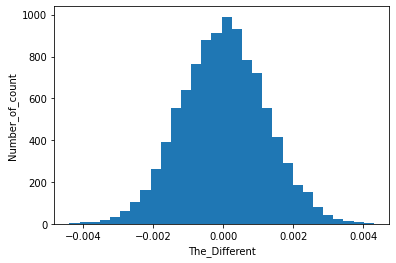

In [29]:
#Creat histogram for p_diffs to discover them

plt.hist(p_diffs,bins=30)
plt.ylabel('Number_of_count') ,plt.xlabel('The_Different')


# It's Looks like a normal distribution

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#we will calculate a actual difference
control=df2.query('group=="control"')
P_control_converted=control['converted'].mean()
P_control_converted

treatment=df2.query('group=="treatment"')
P_treatment_converted=treatment['converted'].mean()
P_treatment_converted

actual_diff=P_treatment_converted - P_control_converted
actual_diff

-0.0015782389853555567

In [31]:
#we will Make show p_diffs as array to able to del with it
p_diffs_array=np.array(p_diffs)
p_diffs_array_mean=p_diffs_array.mean()

diff=p_diffs_array_mean-actual_diff 
p_diffs_array_mean,diff
 

(8.918319864532686e-06, 0.0015871573052200895)

In [32]:
#What proportion of the p_diffs are greater than the actual difference to find pvalue
proportion_p_diffs_g_actual=(p_diffs_array > actual_diff)
proportion_p_diffs_g_actual=proportion_p_diffs_g_actual.mean()
proportion_p_diffs_g_actual

0.9061

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value  that is I computed in part j his  name (p-value), This value mean  there is No difference between a N_page and O_ pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm
import scipy.stats as st
New_page=df2.query('landing_page=="new_page"')
New_page_converted= New_page.query('converted == 1')

Old_page=df2.query('landing_page=="old_page"')
Old_page_converted= Old_page.query('converted == 1')

convert_old = len(Old_page_converted)
convert_new = len(New_page_converted)
n_old = len(Old_page)
n_new = len(New_page)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='smaller')
z_score , p_value

(1.3109241984234394, 0.9050583127590245)

In [35]:
#also i can get the value of p_value from z_score
p_values = st.norm.sf(abs(z_score))

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [36]:
#z-score cumulative distribution 
z_scores=st.norm.cdf(z_score)
#The critical value is 95% confidence. Let's explain this further
Residual=0.95 #out of 100%
critical_value=st.norm.ppf(Residual)

critical_value,z_scores

(1.6448536269514722, 0.9050583127590245)

So what we notice here: Notice that z_score = 1.3
On the other hand, we note that the critical value = 1.64
Therefore, we conclude that the critical value is greater than the value of z_scores, and this means that we fail to reject the null hypothesis, and this result we got is the same as we got in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression
Because In logistic regression, the dependent variable is binary in nature (having two categories). Independent variables can be continuous or binary. In multinomial logistic regression, you can have more than two categories in your dependent variable.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#Create intercept column in df2
df2['intercept'] = 1

#Create dummy variable column 
#ab_page= pd.Series([]) 

#for i in range(len(df2)):
  #if df2['group'][i]== "treatment":
   #ab_page[i]= 1
  #else:
   #ab_page[i]= 0 


#df2.insert(6, "ab_page", ab_page)


#Create dummy variable column name ab_page in df2
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.tail(4)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
log_reg = sm.Logit(df2.converted,df2[['ab_page','intercept']]).fit()
log_reg

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:45:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

In [40]:
log_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-12-01 10:45 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**What is the p-value associated with ab_page?
The p-value associated with ab_page is 0.19 Notic in Part II was 0.90
Why does it differ from the value you found in Part II?
So in Part II was the null hypotheses gives the p_old is greater or  equal(>=) p_new
and the alternative hypotheses gives the p_old is less than(<) p_new.
/
But in Part ||| was the null hypotheses gives the p_old is equal(=) p_new
and the alternative hypotheses gives the p_old is not equal(!=) p_new.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is better to consider other factors because it is not possible to rely on one or two factors. It is better to consider all the factors that are relevant in our analysis and add them to the regression model,
Yes, there are disadvantages if you add additional  factors  has a high correlation or high depending Withe anther  factors ,Why that? becuse that  high correlation between them leads  to Incorrect estimates and  incorrect or inaccurate results in  the regression mode.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
df_countries=pd.read_csv('/content/countries.csv')
df_country=df2.set_index('user_id').join(df_countries.set_index('user_id'))
df_country.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


As for the country with the page, in fact, there were not enough results or clear evidence to be able to confirm whether the user turns the page or not according to the country.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

I dont see  the significant effects on conversion by countryes

In [42]:
df_country.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [43]:
df_country['CA_country'] = pd.get_dummies(df_country['country'])['CA']

df_country['UK_country'] = pd.get_dummies(df_country['country'])['UK']

df_country.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA_country,UK_country
user_id,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0


In [50]:
 df_country['US_new'] = df_country['CA_country'] * df_country['ab_page']
 df_country['UK_new'] = df_country['UK_country'] * df_country['ab_page']

 df_country.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA_country,UK_country,US_new,UK_new
user_id,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,1,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,1
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,1,0


In [51]:
log_reg_country = sm.Logit(df_country.converted,df_country[['ab_page','CA_country','UK_country','intercept','US_new','UK_new']]).fit()
log_reg_country

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [52]:
log_reg_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:               3.482e-05
Time:                        11:00:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_country    -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK_country    -0.0057      0.019     -0.306      0.760      -0.043       0.031
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
US_new        -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_new         0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [53]:
log_reg_country.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-12-01 11:00 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA_country   -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK_country   -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
US_new       -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_new        0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

<a id='Conclusions'></a>
# Conclusions:
In conclusion, and through our Analyze A / B Test, we conclude the following
Through my Analyze, I found that the old page was much better than the new page, and this means that the null hypothesis failed and is rejected.


# Sources:



*  https://www.statology.org/z-score-python/
*   https://stackoverflow.com/
*   https://www.researchgate.net/post/Can_a_p-value_be_10
*  https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
*  https://www.listendata.com/2018/03/regression-analysis.html
*   https://www.geeksforgeeks.org/python-pandas-dataframe-insert/
*   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html







